In [58]:
import DataUtils as du
import numpy as np
from SectionUtils import *
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import pandas as pd
import random

In [59]:
#tworzenie zbiory danych dwu wymiarowych x_train oraz y_train za pomocą funkcji make_blobs z sklearn.datasets.
#Jest w tym zbiorze danych 500 punktów otoczonych wokół jednego centrum, które zostały stworzone w oparciu o jedno odchylenie standardowe
x_train, y_train = make_blobs(n_samples=500, centers=1, random_state=42, cluster_std=1.0)

In [60]:
#skalowanie danych Standardowym skalowaniem z biblioteki sklearn.preprocesing
x_train = du.DataUtils.normalize_data(x_train)

In [61]:
#aplikowanie metody LOF
x_train = du.DataUtils.remove_outliers_lof(x_train)

In [62]:
#przesunięcie danych do środka masy
x_train = du.DataUtils.shift_to_mass_center(x_train)

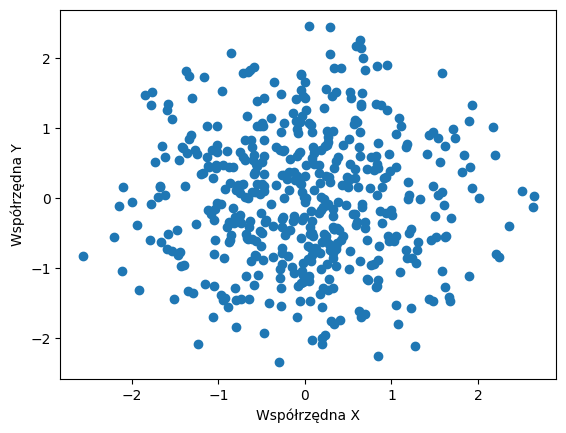

In [63]:
x_train = np.array(x_train)
no_generate = x_train

plt.scatter(x_train[:, 0], x_train[:, 1])
#oznaczanie osi
plt.xlabel("Współrzędna X")
plt.ylabel("Współrzędna Y")
plt.show()

In [64]:
#tworzenie tablicy z elementami klasy Coordinate
x_train = du.DataUtils.listed_class(x_train)

In [65]:
du.DataUtils.setPhiShift(x_train)

0.0

In [66]:
section_count = 7
sectionGroup = SectionGroup(x_train, section_count)

sections = [Section(sectionGroup, i) for i in range(section_count)]

ic(sectionGroup.count)

global_points_gen = 1000

section_size_sum = 0

for section in sections:
    subsections = [SubSection(section, i, j) for i in range(section.subsec_num_phi) for j in range(section.subsec_num_r)]
    for subsection in subsections:
        gen_pts = subsection.generate_subsection_points(sectionGroup.count, global_points_gen)
        subsection.concatenate_points_subsection(gen_pts)

    section.refresh_subsections(subsections)
    section_size_sum += section.count

sectionGroup.refresh_sections(sections)

ic(sectionGroup.count)

print(co.Coordinate.shiftPhi)

ic| sectionGroup.count: 485
ic| sectionGroup.count: 1477


0.0


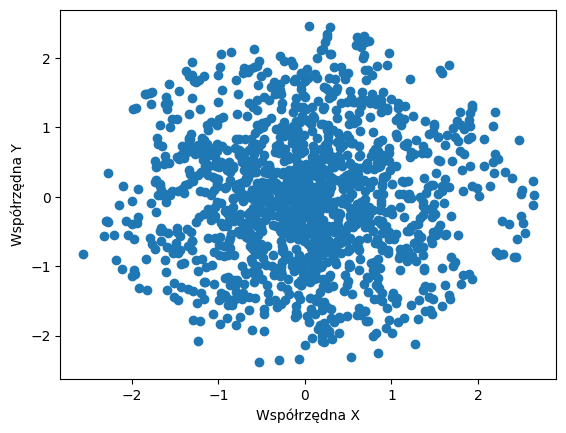

In [67]:
points_array1 = [point.getXY() for point in x_train]
points_array1 = np.array(points_array1)
plt.scatter(points_array1[:, 0], points_array1[:, 1])
plt.xlabel("Współrzędna X")
plt.ylabel("Współrzędna Y")
plt.show()

In [68]:
co.Coordinate.shiftPhi = 0

In [69]:
print(x_train[0].getPhi())

4.480278870189328


In [70]:
# Extract coordinates from points
print(x_train[485])

In [71]:
points_array = [point.getXY() for point in x_train]

In [72]:
print(points_array)

[[-0.19663216169090608, -0.8318819914293075], [-0.5014223302343354, 1.071084926574572], [-0.027748947377301363, -1.0934563584345531], [0.5925616389312817, 2.181764501245546], [0.3696800013952403, -0.6359514889942435], [-1.0532612845968763, -1.251237360584358], [0.2438703371248761, 1.5636563971957347], [2.645097320531193, 0.03277602118968707], [-1.0279378639321888, 0.43901673133423114], [-1.2447064620820456, 0.6350864603706347], [-0.36074952074897787, 1.6559873238197893], [0.9157002459973449, 0.2829234002982912], [-0.8814379457615772, -0.6313206959857166], [1.7070331110797206, 0.9958832058968645], [1.729420536798032, 0.8620473737839877], [0.2856041458888288, 2.0657513708895054], [0.886278536026918, -0.35567466395552416], [0.8360839127665955, -1.2579478282396206], [1.4812735468984555, 0.17125625185354434], [2.016231136772308, 0.008621616532475035], [0.32847183449029005, 0.9567348912005506], [-1.6736489715621583, 0.1782226557914881], [-0.049668681142161684, -1.2053477232724348], [-0.68730

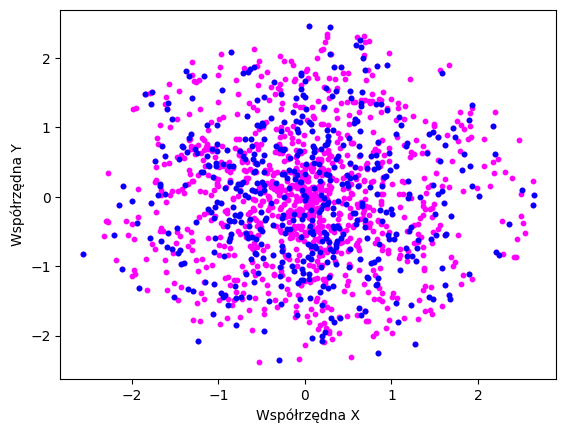

In [73]:
points_array = np.array(points_array)
plt.scatter(points_array[:, 0], points_array[:, 1], color='magenta', s=10)
plt.scatter(no_generate[:, 0], no_generate[:, 1], color = 'blue', s=10)
plt.xlabel("Współrzędna X")
plt.ylabel("Współrzędna Y")
plt.show()

In [74]:
points_array_polar = [[point.getPhi(), point.getR()] for point in x_train]

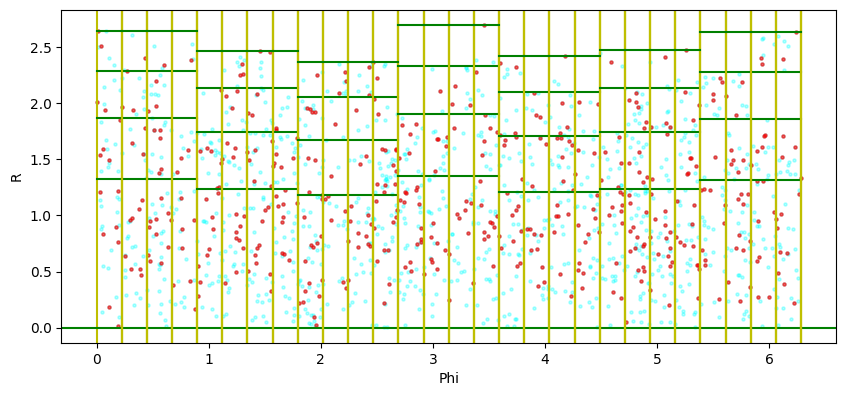

In [75]:
plt.figure(figsize=(10, 10))
points_array_polar = np.array(points_array_polar)
no_generate = du.DataUtils.listed_class(no_generate)
points_polar_no_generate = [[point.getPhi(), point.getR()] for point in no_generate]
points_polar_no_generate = np.array(points_polar_no_generate)
plt.scatter(points_array_polar[:, 0], points_array_polar[:, 1], color='cyan', s=5, alpha=0.3)
plt.scatter(points_polar_no_generate[:, 0], points_polar_no_generate[:, 1], color='red', s=5, alpha=0.6)
plt.axvline(x=0, color='y')
plt.axhline(y=0, color='g')

du.DataUtils.setPhiShift(x_train)

for section in sections:
    subsections = [SubSection(section, i, j) for i in range(section.subsec_num_phi) for j in range(section.subsec_num_r)]
    for subsection in subsections:
        plt.axvline(x=subsection.phi_range[1], color='y')
        x_range = np.linspace(subsection.phi_range[0], subsection.phi_range[1])
        y_value = np.ones_like(x_range) * subsection.r_range[1]
        
        plt.plot(x_range, y_value, color='g')
plt.gca().set_aspect('equal')
plt.xlabel("Phi")
plt.ylabel("R")
plt.show()

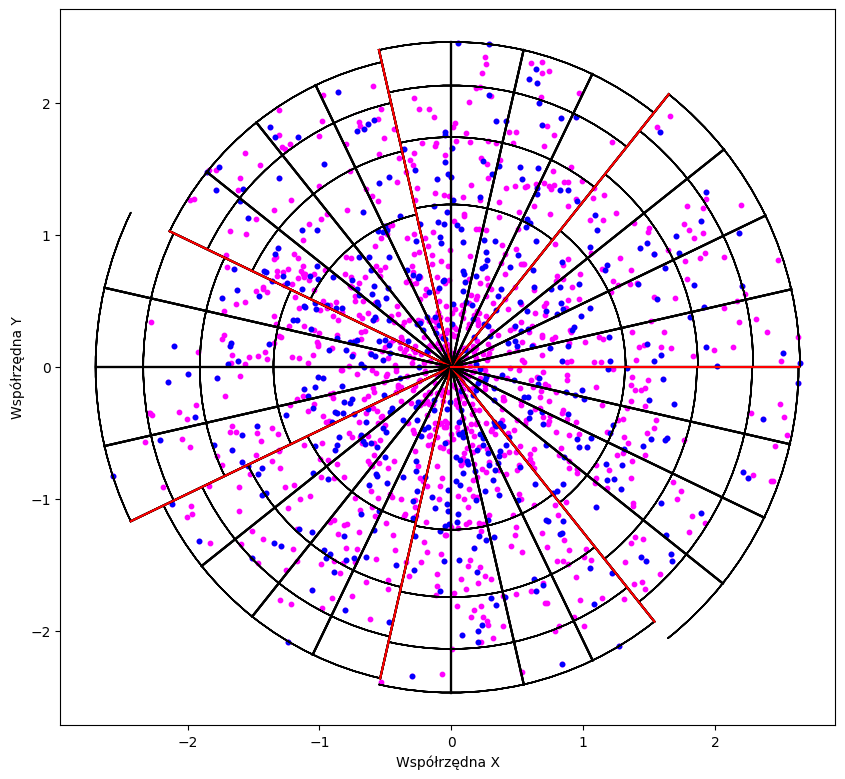

In [80]:
plt.figure(figsize=(10, 10))

co.Coordinate.shiftPhi = 0

xy_data_no_generate = [point.getXY() for point in no_generate]
xy_data_no_generate = np.array(xy_data_no_generate)


plt.scatter(points_array[:, 0], points_array[:, 1], color='magenta', s=10)
plt.scatter(xy_data_no_generate[:, 0], xy_data_no_generate[:, 1], color = 'blue', s=10)
for section in sections:
    subsections = [SubSection(section, i, j) for i in range(section.subsec_num_phi) for j in range(section.subsec_num_r)]
    for subsection in subsections:
        x = np.cos(subsection.phi_range[1]) * section.max_r
        y = np.sin(subsection.phi_range[1]) * section.max_r
        plt.plot([0, x], [0, y], color='black')
    
    sec_x = np.cos(section.phi_size * (section.section_index + 1)) * section.max_r
    sec_y = np.sin(section.phi_size * (section.section_index + 1)) * section.max_r
    plt.plot([0, sec_x], [0, sec_y], color='red')

for section in sections:
    subsections = [SubSection(section, i, j) for i in range(section.subsec_num_phi) for j in range(section.subsec_num_r)]
    for subsection in subsections:

        wycinek_center = Wedge(center=(0, 0), r=subsection.r_range[1], 
                               theta1=np.degrees(section.phi_size * section.section_index), 
                               theta2=np.degrees(section.phi_size * (section.section_index + 1)), width=0.001, color='black')
    
        plt.gca().add_patch(wycinek_center)

plt.gca().set_aspect('equal')
plt.xlabel("Współrzędna X")
plt.ylabel("Współrzędna Y")
plt.show()